### The Normal Equation

In [1]:
import numpy as np

# for the purpose of generating linear-looking data to test the Normal Equation
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.84010225],
       [3.16995395]])

In [4]:
# Make prediction using Theta - to find the value of theta that minimizes he cost function
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84010225],
       [10.18001015]])

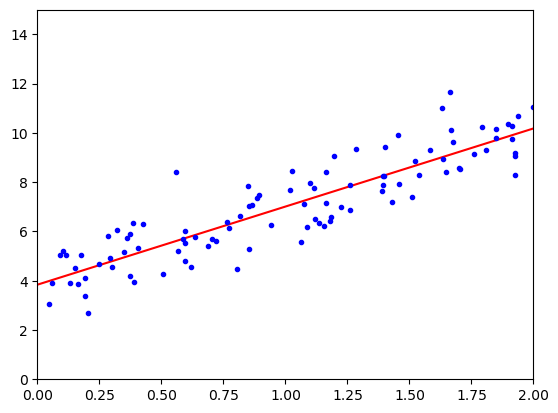

In [5]:
# plotting the model's prediction
from matplotlib import pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.84010225]), array([[3.16995395]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.84010225],
       [10.18001015]])

In [8]:
# using np.linalg.pinv() to compute the pseudo-inverse directly:
np.linalg.pinv(X_b).dot(y)

array([[3.84010225],
       [3.16995395]])

### Computational Complexity

If you double the number of features, you multiply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8
The SVD approach is about O(n^2), i.e. double the number of features, you multiply by the computation time by roughly 4
The computational complexity is linear w/regards to both the number o finstances you want to make predictions on
and the number of features. In other words, making precition on twice as many instances (or twice as many features)
will just take roughly twice as much time.

### Gradient Descent

The general idea is to tweak parameters iteratively in order to minimize a cost function.
The MSE cost function for a LinearRegression model happens to be a convex function, which
means if you pick any two points on the curve, the line segment joining them never crosses
the curve. This implies that there are no local minima, just one global minimum. 
This diagram also illustrates the fact that training a model means searching for a
combination of model parameters that minimizes a cost function (over the training
set). It is a search in the model’s parameter space: the more parameters a model has,
the more dimensions this space has, and the harder the search is: searching for a nee‐
dle in a 300-dimensional haystack is much trickier than in three dimensions. Fortu‐
nately, since the cost function is convex in the case of Linear Regression, the needle is
simply at the bottom of the bowl.

### Batch Gradient Descent

once you have the gradient vector, which points uphill, just go in the
opposite direction to go downhill.
eta = learning rate

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[3.84010225],
       [3.16995395]])

### Stochastic Gradient Descent

Due to its stochastic (random) nature, instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average.
Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down. Once the algorithm stops, the final
parameter values are good, but not optimal.

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so SGD has a better chance of finding the global minimum than BGD.
Randomness is good to escape from local optima, but bad because it means the algorithm can never settle at the minimum.

In [11]:
# This code implements SGD using a simple learning schedule:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[3.82290031],
       [3.17030269]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90426344]), array([3.2615127]))

### Mini_batch Gradient Descent

Mini-batch GD computes the graduents on small random sets of instances. The main advantage over SGD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

They all end up near the minimum, but Batch GD's path acutually stops at the minimum, while both SGD and Mini-batch GD continue to walk around.
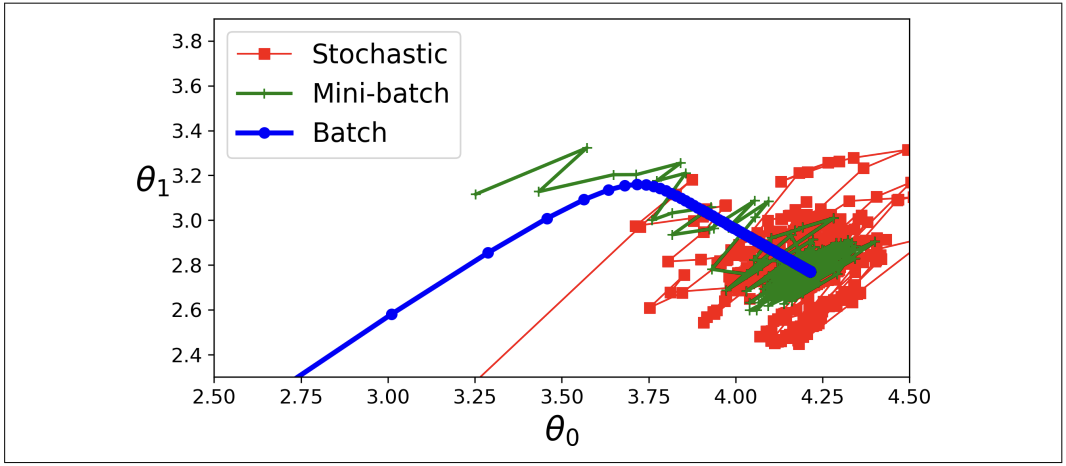

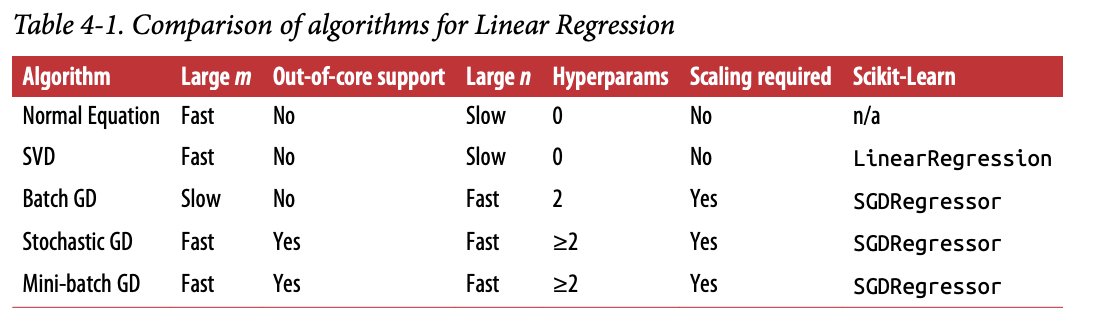

### Polynomial Regression

It is a technique that fits a linear model to nonlinear data by adding powers of each feature as new features, then train a linear model on this extended set of features.

In [15]:
# generate some nonlinear data, based on simple quadratic equation
# y = a * x**2 + b * x + c
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [16]:
# adding the square of each feature in the training set as new features
# in this case there is just one feature
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.7885519])

In [17]:
X_poly[0]

array([2.7885519 , 7.77602169])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00088953]), array([[1.04332477, 0.47035167]]))

the model estimates y-cap = 0.45x**2 + 1.05x + 2.17 when in fact the original fucntion was y = 0.5x**2 + 1.0x1 + 2.0 + Gaussian noise

### Learning Curve

Comparing the result with a pure linear model, a quadratic model (2nd degree polynomial), and a 300-degree polynomial model to the preceding training data, notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.
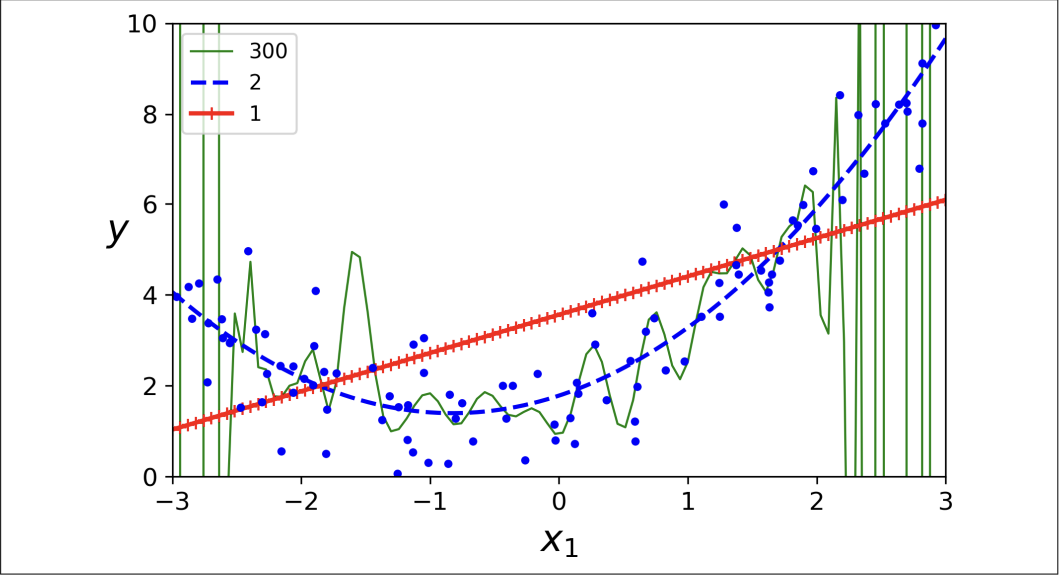

High-degree Polynomial Regression model is overfitting, while linear model is underfitting it

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)

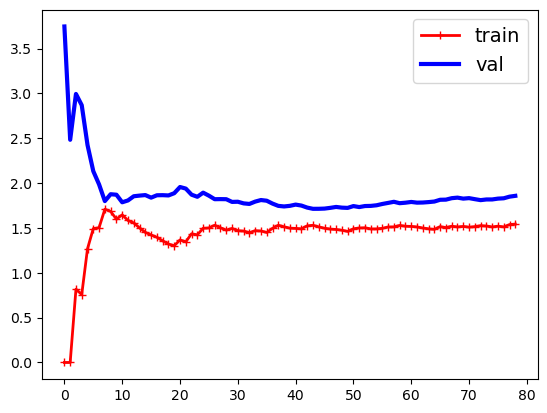

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Training data - model can fit perfectly when there are just 1 or 2 instances, hence curve starts at 0. As new instances are added, it becomes impossible for the model to fit training data perfectly due to noisy and nonlinear data. Therefore, error goes up until reaches plateau, at which point adding new instances doesn't make the avg error better or worse.

Validation data - trained on very few instances it is incapable of generalizing properly, hence the big initial start. As more training examples are shown, it learns and thus the validation error slowly goes down. However, error ends up at a plateau due to a straight line cannot do a good job modeling the data.

These learning curves are typical of an underfitting model - adding more taining examples will not help. Will need to use a more complex model or come up with better features.

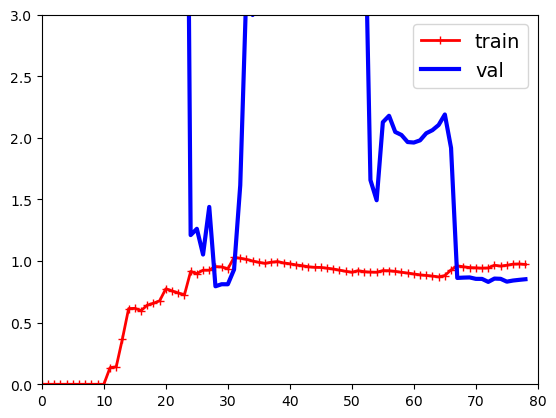

In [21]:
# learning curves of a 10th degree polynomial model:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression, X, y)

Lower error on the training data than with Linear Regression model.
The gap between the curves means the model performs significantly better on the trainin data than on the validation data, which indicates an overfitting model.

### The Bias/Variance Tradeoff:

Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance.

### Regularized Linear Models

good way to reduce overfitting is to regularie model, ex: simple way to regularize a polynomial model is to reduce the number of polynomial degrees

#### Ridge Regression

a (alpha) controls how much you want to regularize the model; if a=0, the Ridge Regression is just Linear Regression. If a is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

On the left, plain Ridge models are used, leading to linear predictions. On the right, data is first expandded using PolynomialFeatures(degree=10), then scaled using StandardScaler, and finally the Ridge models are applied to the resulting features.

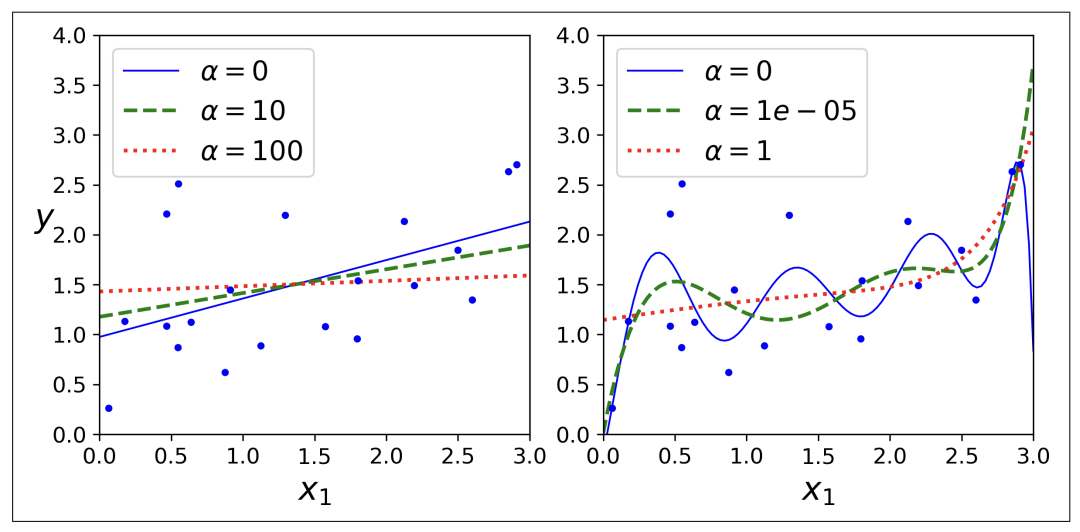

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [23]:
ridge_reg.predict([[1.5]])

array([[5.10854476]])

In [24]:
# the penalty hyperparamter sets the type of regularization term to use
# l2 indicates you want SGD to add a regularization term to the cost function equal to half
# the square of the l2 norm of the weight vector
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.09313496])

#### Lasso Regression

Similar to Ridge, it adds a regularization term to the cost function, but it uses the l2 form of the weight vector instead of half the square of the l2 norm.

Replace Ridge model w/Lasso models and uses smaller a (alpha) values.

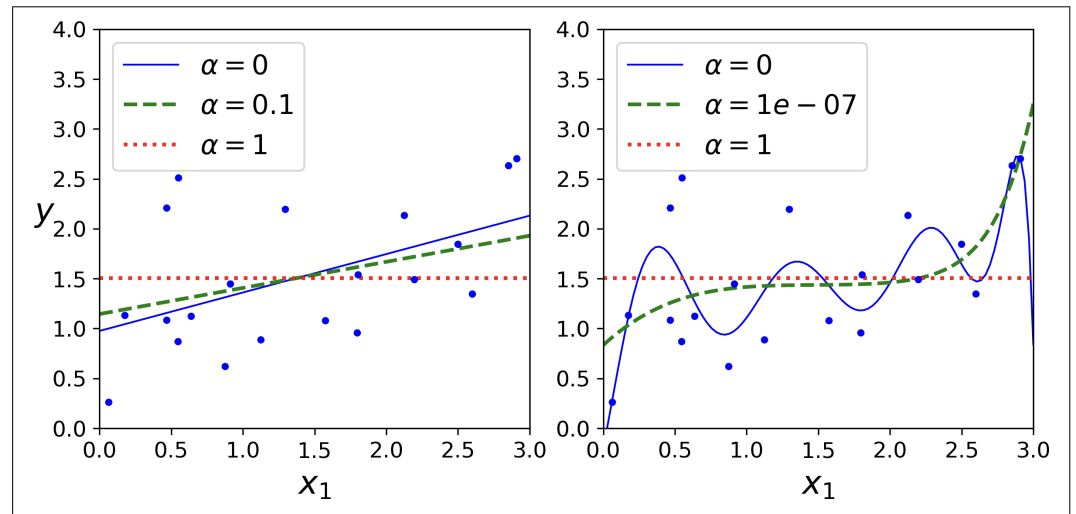

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.06827637])

#### Elastic Net

Middle ground btw Ridge and Lasso Regressions. When r=0, Elastic Net is equivalent to Ridge, when r=1, it is equivalent to Lasso.

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.06873025])

#### Early Stopping

Stop training as soon as validation error reaches a minimum

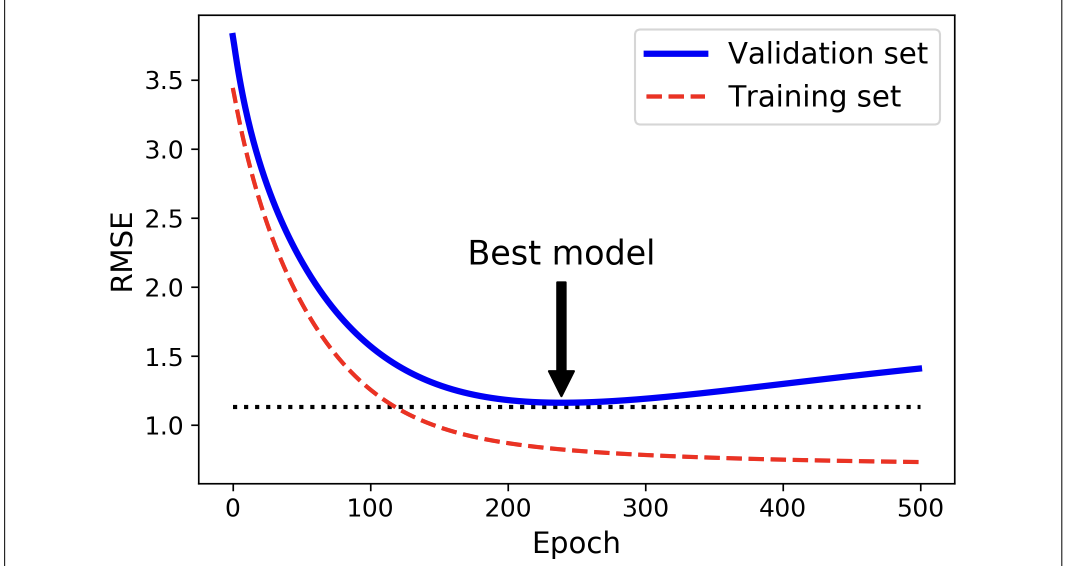

In [28]:
# using random data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [49]:
from sklearn.base import clone # clones the same model that has not been fitted to any data
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start = True, when fit() method is called, it just continues training where it left off instead of restarting from scratch
sgd_reg = SGDRegressor(max_iter=1, tol=0.0, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/alexlei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/alexlei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/alexlei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/alexlei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/alexl

### Logistic Regression
#### Decision Boundaries

In [50]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [51]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

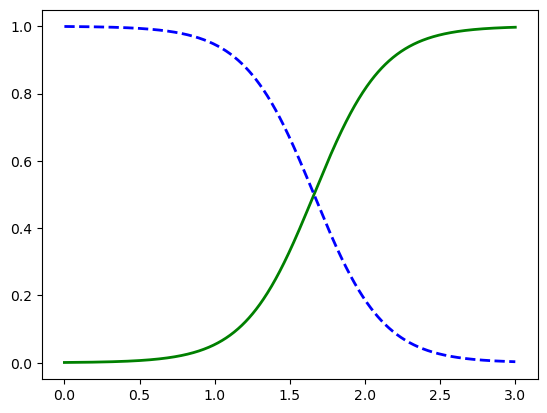

In [53]:
# estimated prob for flowers w/petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [54]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

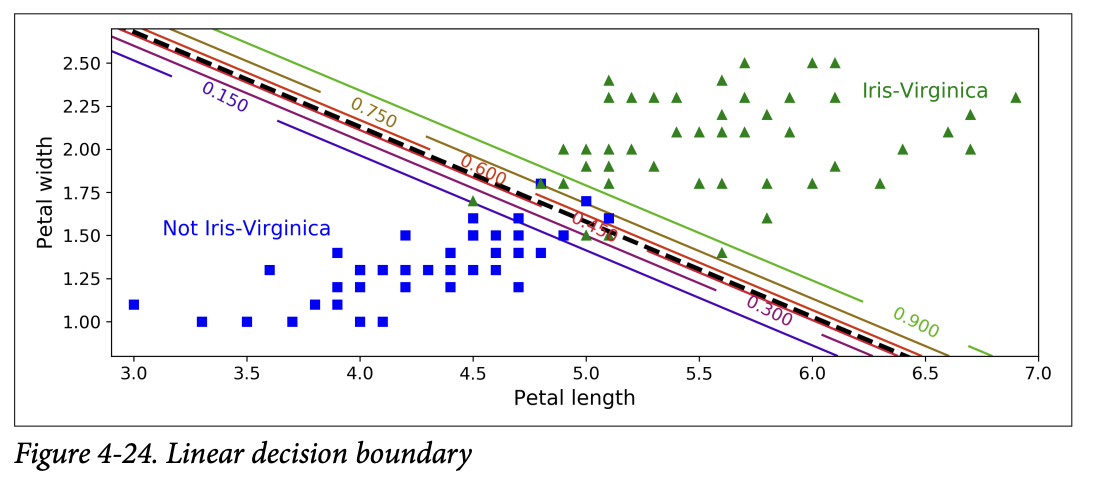

#### Softmax Regression (or Multinomial Logistic Regression)

It predicts only one class at a time (i.e. it is multiclass, not multioutput) so it should be used only w/mutually exclusive classes such as diff types of plants. Cannot be used to recognize multiple people in one picture.

ScikitLearn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead.You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver. It also applies ℓ2 regularization by default, which you can control using the hyperparameter C.

In [55]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [56]:
softmax_reg.predict([[5, 2]])

array([2])

In [57]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercises

1. If you have a training set w/millions of features, use Stochastic Gradient Descent or Mini-bath Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory.

2. If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before training the model. Note that the Normal Equation or SVD approach will work just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features are not scaled.

3. Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex.

4. If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.

...